Using device: mps
class: 10 (['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])


Epoch [1/30] | Loss: 2.3404 | Train Acc: 0.2003 | Test Acc: 0.1650


Epoch [2/30] | Loss: 1.8308 | Train Acc: 0.3655 | Test Acc: 0.3350


Epoch [3/30] | Loss: 1.5761 | Train Acc: 0.4368 | Test Acc: 0.5000


Epoch [4/30] | Loss: 1.3913 | Train Acc: 0.5069 | Test Acc: 0.5800


Epoch [5/30] | Loss: 1.2856 | Train Acc: 0.5620 | Test Acc: 0.5150


Epoch [6/30] | Loss: 1.1872 | Train Acc: 0.5745 | Test Acc: 0.5750


Epoch [7/30] | Loss: 1.0098 | Train Acc: 0.6558 | Test Acc: 0.4950


Epoch [8/30] | Loss: 0.9398 | Train Acc: 0.6721 | Test Acc: 0.6200


Epoch [9/30] | Loss: 0.8609 | Train Acc: 0.7196 | Test Acc: 0.6200


Epoch [10/30] | Loss: 0.7324 | Train Acc: 0.7685 | Test Acc: 0.6600


Epoch [11/30] | Loss: 0.6533 | Train Acc: 0.8023 | Test Acc: 0.6150


Epoch [12/30] | Loss: 0.5753 | Train Acc: 0.8273 | Test Acc: 0.6400


Epoch [13/30] | Loss: 0.5545 | Train Acc: 0.8273 | Test Acc: 0.6900


Epoch [14/30] | Loss: 0.4316 | Train Acc: 0.8786 | Test Acc: 0.7050


Epoch [15/30] | Loss: 0.3887 | Train Acc: 0.8986 | Test Acc: 0.7150


Epoch [16/30] | Loss: 0.3314 | Train Acc: 0.9161 | Test Acc: 0.7200


Epoch [17/30] | Loss: 0.3084 | Train Acc: 0.9274 | Test Acc: 0.7050


Epoch [18/30] | Loss: 0.2685 | Train Acc: 0.9474 | Test Acc: 0.7300


Epoch [19/30] | Loss: 0.2731 | Train Acc: 0.9362 | Test Acc: 0.6600


Epoch [20/30] | Loss: 0.2151 | Train Acc: 0.9587 | Test Acc: 0.7250


Epoch [21/30] | Loss: 0.1823 | Train Acc: 0.9637 | Test Acc: 0.7600


Epoch [22/30] | Loss: 0.1593 | Train Acc: 0.9650 | Test Acc: 0.6950


Epoch [23/30] | Loss: 0.1696 | Train Acc: 0.9725 | Test Acc: 0.7200


Epoch [24/30] | Loss: 0.1161 | Train Acc: 0.9862 | Test Acc: 0.7450


Epoch [25/30] | Loss: 0.1253 | Train Acc: 0.9825 | Test Acc: 0.7350


Epoch [26/30] | Loss: 0.1040 | Train Acc: 0.9900 | Test Acc: 0.7300


Epoch [27/30] | Loss: 0.1034 | Train Acc: 0.9850 | Test Acc: 0.7300


Epoch [28/30] | Loss: 0.1099 | Train Acc: 0.9837 | Test Acc: 0.7450


Epoch [29/30] | Loss: 0.0962 | Train Acc: 0.9862 | Test Acc: 0.7550


Epoch [30/30] | Loss: 0.0774 | Train Acc: 0.9900 | Test Acc: 0.7200
Done！
final accuracy: 72.0000%
Image Saved


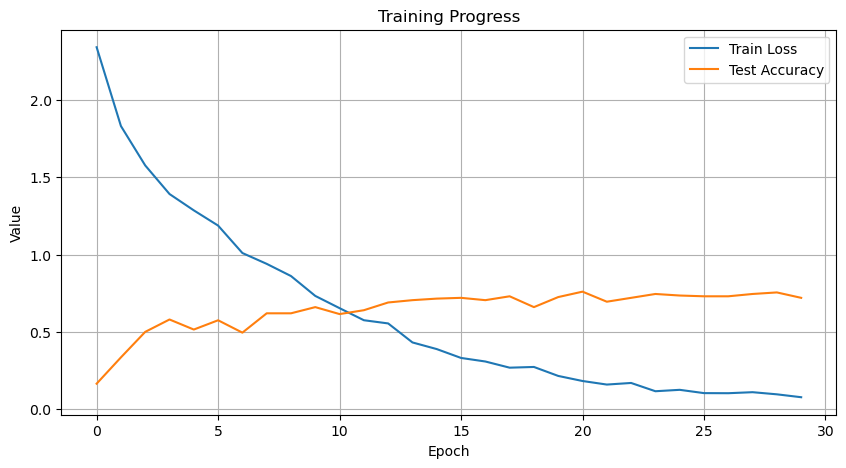

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm

DATA_DIR = "../image_data/Data/images_original"
BATCH_SIZE = 32
IMG_SIZE = 128
LEARNING_RATE = 0.0001
EPOCHS = 30


if torch.cuda.is_available():
    DEVICE = 'cuda'
elif torch.backends.mps.is_available():
    DEVICE = 'mps'
else:
    DEVICE = 'cpu'
print(f"Using device: {DEVICE}")

train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

try:
    full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=train_transform)
except Exception as e:
    exit()

class_names = full_dataset.classes
num_classes = len(class_names)
print(f"class: {num_classes} ({class_names})")

generator = torch.Generator().manual_seed(42)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_data, test_data = random_split(full_dataset, [train_size, test_size], generator=generator)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# --- 3. モデル定義 ---
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.fc_input_size = 256 * 8 * 8
        self.dropout = nn.Dropout(0.6)
        self.fc = nn.Linear(self.fc_input_size, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

model = CustomCNN(num_classes).to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)

train_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", leave=False)
    
    for images, labels in progress_bar:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        progress_bar.set_postfix({'loss': loss.item()})
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
    
    test_acc = test_correct / test_total
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{EPOCHS}] | Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f} | Test Acc: {test_acc:.4f}")

print("Done！")
print(f"final accuracy: {test_accuracies[-1]*100:.4f}%")

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Progress')
plt.legend()
plt.grid()
plt.savefig('training_result.png')
print("Image Saved")